In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [16]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [17]:
results = pd.read_csv('test_mpcevent_cycles', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [18]:
results = results.fillna(0)

In [19]:
domains

[418, 694, 35774, 1677]

In [6]:
results

,ranker,day,domain,correct,total,precision,recall
0,mpc_event_1,1,418,2490,8673,0.287098,0.240143
1,mpc_event_1,1,694,94,546,0.172161,0.280000
2,mpc_event_1,1,2522,0,0,0.000000,0.000000
3,mpc_event_1,1,35774,40195,60688,0.662322,0.505190
4,mpc_event_1,1,3336,0,2,0.000000,0.000000
5,mpc_event_1,1,13554,0,0,0.000000,0.000000
6,mpc_event_1,1,596,0,0,0.000000,0.000000
7,mpc_event_1,1,1677,14743,26287,0.560848,0.212389
8,mpc_event_1,2,418,3251,8958,0.362916,0.184564
9,mpc_event_1,2,694,92,601,0.153078,0.218182


In [7]:
linestyles = [[8, 4, 2, 4, 2, 4],[2, 2, 2, 2, 2, 2], [4, 8, 4, 1, 1, 1], [10, 10], [5, 10, 20, 10]]

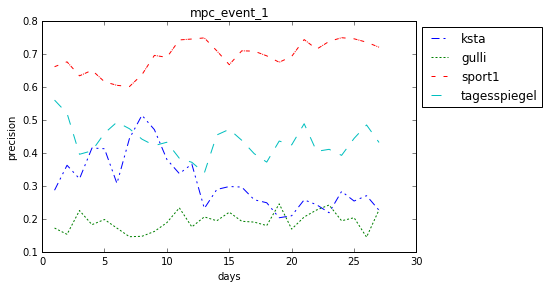

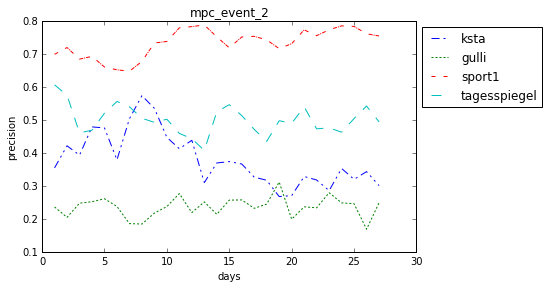

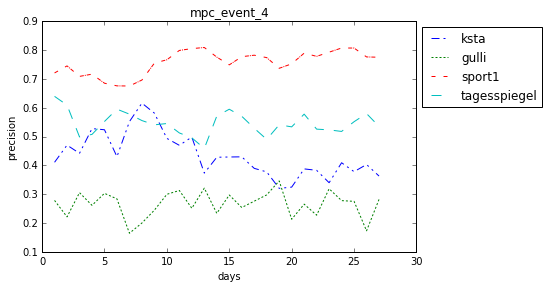

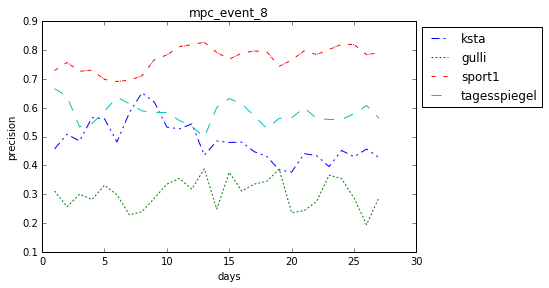

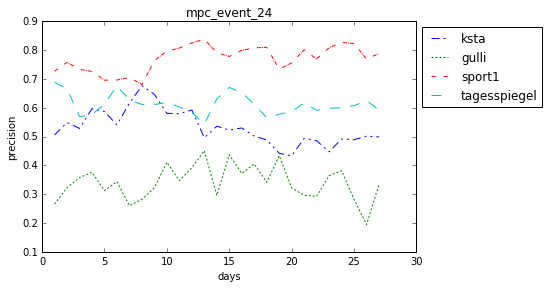

In [8]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    j = 0
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.65,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)
        j = j + 1


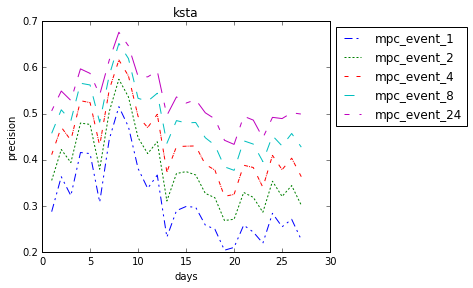

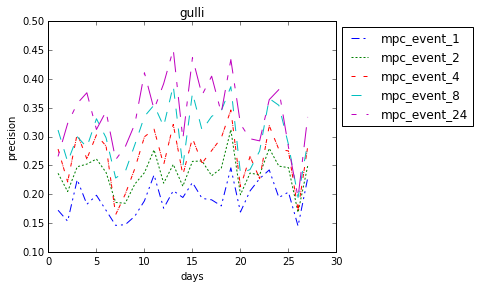

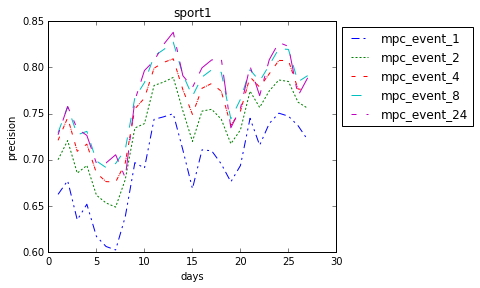

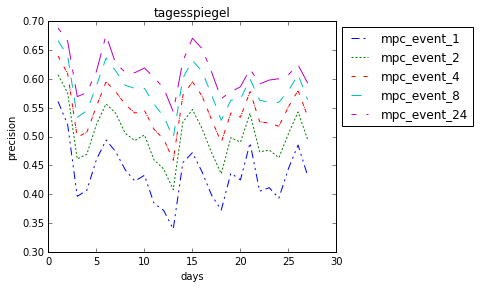

In [9]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    j = 0
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.5,0.8])
        ax.set_xlabel('days')
        ax.set_ylabel('precision')
        ax.plot(days, precision, dashes=linestyles[j])
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)
        j = j + 1
        

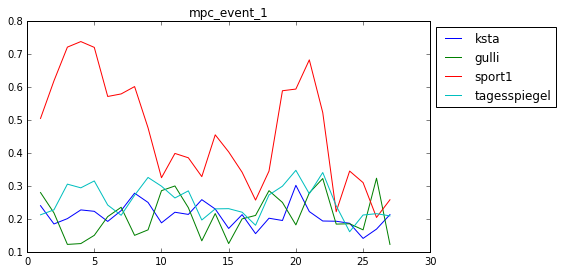

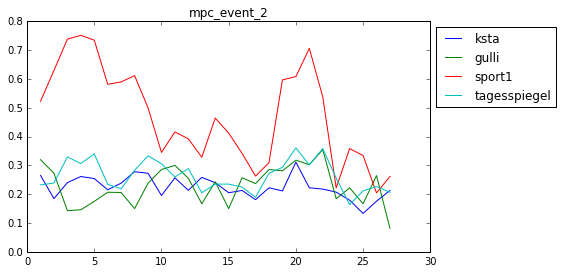

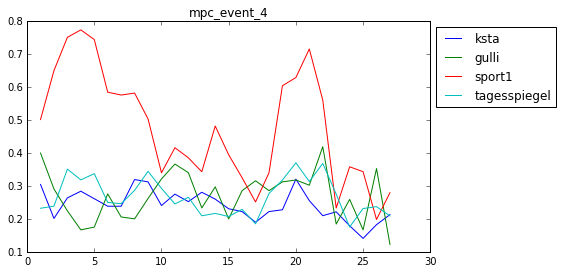

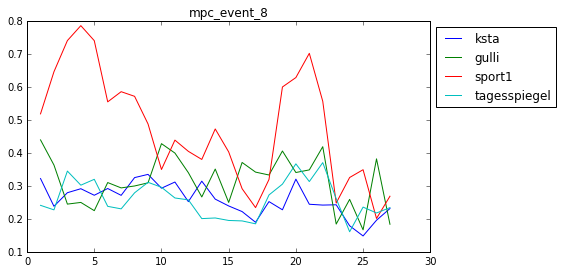

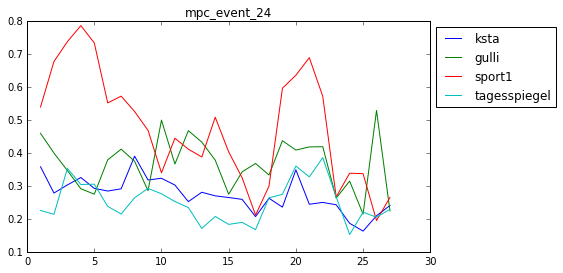

In [10]:
#recall per ranker
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1_recall.png' % ranker)

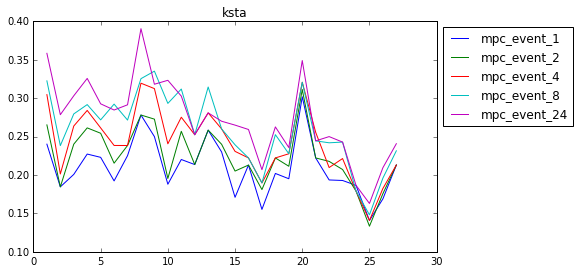

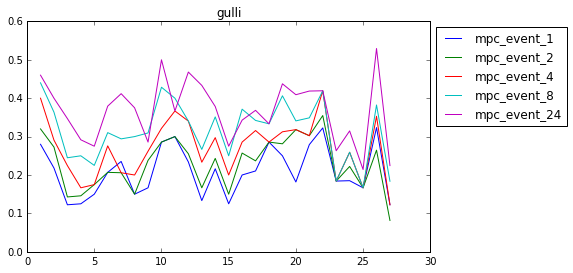

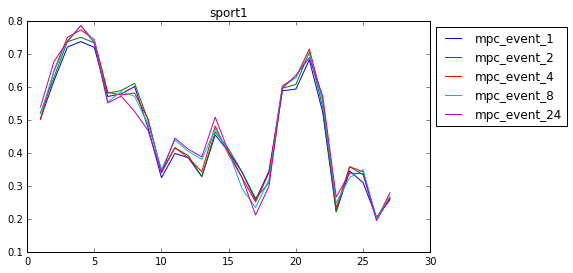

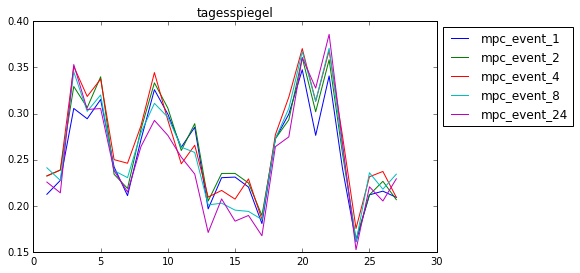

In [11]:
#recall per domain
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)

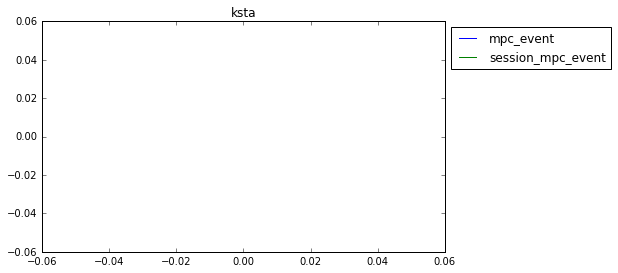

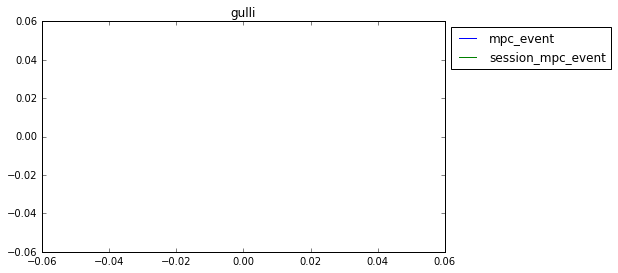

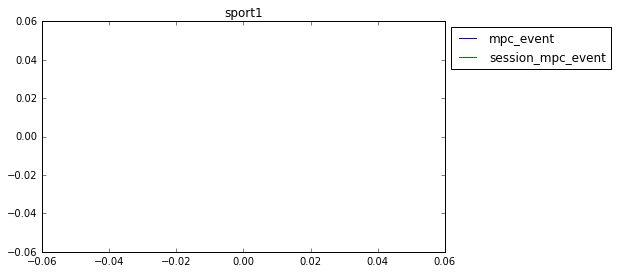

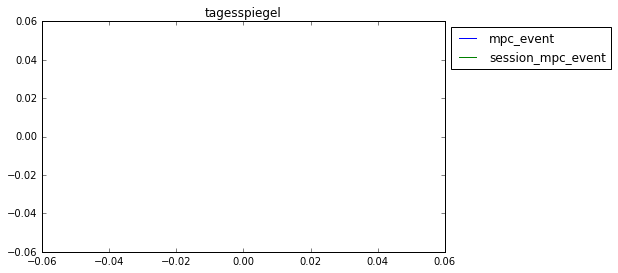

In [12]:
i=0
rankers = ['mpc_event', 'session_mpc_event']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_event_%s.png' % domain)

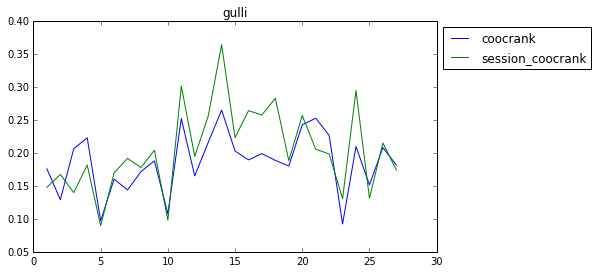

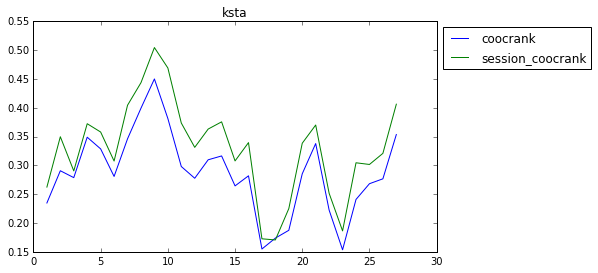

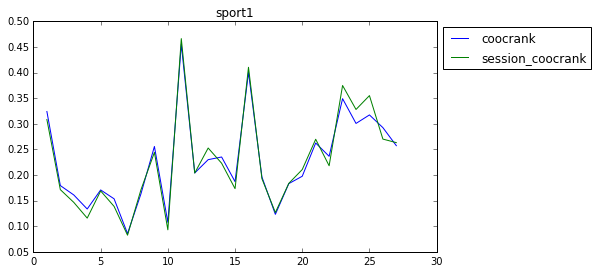

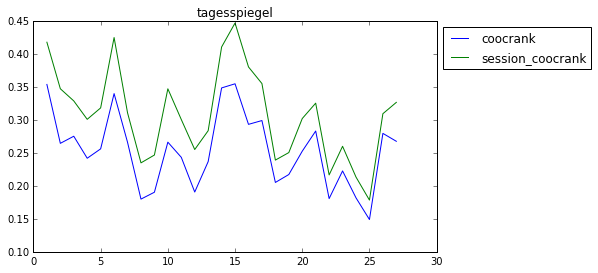

In [39]:
i=0
rankers = ['coocrank', 'session_coocrank']
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('session_rankers_coocrank_%s.png' % domain)

In [20]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        print(domain, ranker, np.mean(recall.values))
        

694 mpc_event 0.351948850452
694 session_mpc_event 0.367959341101
694 coocrank 0.29748814743
694 poprank 0.0851925548641
694 session_coocrank 0.286694876038
694 seqrank 0.31228724085
694 contentrank 0.0323526571443
694 session_seqrank 0.2846139825
418 mpc_event 0.284767198474
418 session_mpc_event 0.257334883297
418 coocrank 0.333399581753
418 poprank 0.059961796458
418 session_coocrank 0.304918150297
418 seqrank 0.323478639678
418 contentrank 0.0558111783595
418 session_seqrank 0.333771721428
35774 mpc_event 0.510803534286
35774 session_mpc_event 0.406845544971
35774 coocrank 0.388428448927
35774 poprank 0.069830315361
35774 session_coocrank 0.281813770625
35774 seqrank 0.452408478412
35774 contentrank 0.175698916335
35774 session_seqrank 0.383429086267
1677 mpc_event 0.227357128833
1677 session_mpc_event 0.185818306282
1677 coocrank 0.173267905504
1677 poprank 0.0305944760629
1677 session_coocrank 0.148204456532
1677 seqrank 0.18356583224
1677 contentrank 0.0352808451247
1677 session

In [20]:
import numpy as np
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker, np.mean(recall.values))

mpc_event_1 0.284645010908
mpc_event_2 0.297739845217
mpc_event_4 0.314240581719
mpc_event_8 0.32741392673
mpc_event_24 0.341875627694


In [21]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker, np.mean(precision.values))

mpc_event_1 0.40844123067
mpc_event_2 0.463201140507
mpc_event_4 0.501017110204
mpc_event_8 0.534538672652
mpc_event_24 0.563800042144
